<img src="Canada.jpeg" style="height: 250px">
<center style="color:#888">Siniestros en Canadá

Trabajo elaborado por: Sara Arranz Armesto, Fátima Fontenla González, Jorge García Hernandez, Daniel Muñoz Plaza, Javier Pedrazuela Flor, Mario Retuerta Jiménez.



### Problema abordado:

El trabajo consta de dos partes, la primera de ellas trata un problema de análisis supervisado en el que se ajusta un modelo para predecir si un accidente es mortal o no, al igual que si se necesitará tratamiento médico en el caso de haber heridos. Para ello, utilizaremos distintos modelos viendo cual de ellos se comporta mejor.

La siguiente parte consistirá en un problema de análisis no supervisado en el que clasificaremos los datos en distintos grupos a partir de diferentes algoritmos de clustering, para su posterior estudio.


El dataset elegido trata sobre los siniestros que han ocurrido en Canada desde 1999 a 2014. Al tratarse de datos reales, requieren una limpieza y procesamiento previo mas exhaustivo, en consecuencia en las siguientes celdas se refleja cómo hemos abordado el preprocesamiento de los datos:

### Preprocessing:

Importamos todas las librerías necesarias:  

In [375]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, seed
from sklearn.neighbors import kneighbors_graph
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_mutual_info_score
import seaborn as sns

Ahora bien, introducimos los datos cuyo dataset se encuentra en el siguiente enlace:
https://www.kaggle.com/datasets/tbsteal/canadian-car-accidents-19942014?select=drivingLegend.pdf  





In [376]:
ncdb= pd.read_csv('NCDB_1999_to_2014.csv')

D:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [377]:
ncdb.shape

(5860405, 22)

A través del enlace hemos obtenido el pdf llamado: _drivingLegend_ donde nos indican los valores que toma cada variable. Analizando el documento observamos que si las variables toman los valores 'U','UU' o 'UUUU' indica que en ese caso no se han proporcionado los datos, en consecuencia definiremos estos valores como datos faltantes o missing:

In [378]:
ncdb.loc[ncdb['C_MNTH']=='UU', 'C_MNTH']= np.nan
ncdb.loc[ncdb['C_HOUR']=='UU', 'C_HOUR']= np.nan
ncdb.loc[ncdb['C_VEHS']=='UU', 'C_VEHS']= np.nan
ncdb.loc[ncdb['C_CONF']=='UU', 'C_CONF']= np.nan
ncdb.loc[ncdb['C_RCFG']=='UU', 'C_RCFG']= np.nan
ncdb.loc[ncdb['C_TRAF']=='UU', 'C_TRAF']= np.nan
ncdb.loc[ncdb['V_ID']=='UU', 'V_ID']= np.nan
ncdb.loc[ncdb['V_TYPE']=='UU', 'V_TYPE']= np.nan
ncdb.loc[ncdb['P_ID']=='UU', 'P_ID']= np.nan
ncdb.loc[ncdb['P_AGE']=='UU', 'P_AGE']= np.nan
ncdb.loc[ncdb['P_PSN']=='UU', 'P_PSN']= np.nan
ncdb.loc[ncdb['P_SAFE']=='UU', 'P_SAFE']= np.nan

In [379]:
ncdb.loc[ncdb['C_WDAY']=='U', 'C_WDAY']= np.nan
ncdb.loc[ncdb['C_WTHR']=='U', 'C_WTHR']= np.nan
ncdb.loc[ncdb['C_RSUR']=='U', 'C_RSUR']= np.nan
ncdb.loc[ncdb['C_RALN']=='U', 'C_RALN']= np.nan
ncdb.loc[ncdb['P_ISEV']=='U', 'P_ISEV']= np.nan
ncdb.loc[ncdb['C_SEV']=='U', 'C_SEV']= np.nan
ncdb.loc[ncdb['P_SEX']=='U', 'P_SEX']= np.nan

In [380]:
ncdb.loc[ncdb['V_YEAR']=='UUUU', 'V_YEAR']= np.nan

In [381]:
ncdb.isna().sum() 

C_YEAR         0
C_MNTH       385
C_WDAY      1323
C_HOUR     59409
C_SEV          0
C_VEHS       544
C_CONF    179019
C_RCFG    504648
C_WTHR     87975
C_RSUR     78451
C_RALN    434710
C_TRAF    223483
V_ID         433
V_TYPE     29754
V_YEAR    324122
P_ID          16
P_SEX     234954
P_AGE     377140
P_PSN      57662
P_ISEV     80701
P_SAFE    615188
P_USER         0
dtype: int64

In [382]:
ncdb.shape[0]

5860405

Debido a la gran cantidad de observaciones vamos a tomar una submuestra ya que trabajar con tantos datos supone un coste computacional muy elevado que nos imposibilita trabajar correctamente.

In [383]:
a = ncdb.isna().sum()/ncdb.shape[0]

In [384]:
ncdb=ncdb.sample(frac=0.01,random_state=0,axis=0)

In [385]:
b = ncdb.isna().sum()/ncdb.shape[0]

In [386]:
a-b

C_YEAR    0.000000
C_MNTH   -0.000037
C_WDAY   -0.000081
C_HOUR    0.000138
C_SEV     0.000000
C_VEHS   -0.000078
C_CONF    0.000976
C_RCFG   -0.001630
C_WTHR   -0.000636
C_RSUR    0.000179
C_RALN   -0.001159
C_TRAF   -0.001044
V_ID     -0.000011
V_TYPE   -0.000537
V_YEAR   -0.000867
P_ID      0.000003
P_SEX     0.000845
P_AGE     0.000502
P_PSN    -0.000245
P_ISEV   -0.000887
P_SAFE   -0.001367
P_USER    0.000000
dtype: float64

Observamos que aproximadamente tienen una media parecida de valores faltantes, por tanto continuamos el estudio con la submuestra generada:

In [387]:
ncdb.shape

(58604, 22)

In [388]:
ncdb.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
3875526,2008,11,1,13,2.0,2,NaN,02,2,3,...,1,01,1997,01,M,73,11,1,NaN,1
5184676,2012,10,6,12,2.0,1,06,02,3,2,...,01,01,1999,01,M,17,11,2,02,1
5109095,2012,8,2,00,2.0,1,04,01,1,1,...,01,01,1999,01,M,33,11,2,02,1
4268397,2010,01,2,10,2.0,02,21,02,1,2,...,1,01,2005,01,M,50,11,1,02,1
4655495,2011,3,2,02,2.0,2,06,01,1,1,...,1,01,2009,02,M,36,13,1,02,2
5493879,2013,10,4,22,2.0,2,36,02,3,2,...,1,01,NaN,02,M,11,23,2,02,2
1104880,2001,9,1,16,2.0,2,35,02,1,1,...,01,01,1965,02,F,25,13,2,02,2
4776704,2011,7,7,16,2.0,3,35,02,1,1,...,02,01,1997,02,F,32,13,1,02,2
4254445,2009,12,5,11,2.0,2,36,02,1,1,...,1,01,2007,01,F,26,11,2,02,1
4797261,2011,8,5,11,2.0,01,03,NaN,1,1,...,01,01,2008,02,F,52,13,2,02,2


Al tomar una submuestra los índices que se reflejan en la tabla anterior son los correspondientes al dataset completo. Por tanto, cambiamos los índices para que correspondan con la fila actual del dataset de la submuestra:

In [389]:
ncdb.reset_index(drop=True,inplace=True)

In [390]:
ncdb.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2008,11,1,13,2.0,2,NaN,02,2,3,...,1,01,1997,01,M,73,11,1,NaN,1
1,2012,10,6,12,2.0,1,06,02,3,2,...,01,01,1999,01,M,17,11,2,02,1
2,2012,8,2,00,2.0,1,04,01,1,1,...,01,01,1999,01,M,33,11,2,02,1
3,2010,01,2,10,2.0,02,21,02,1,2,...,1,01,2005,01,M,50,11,1,02,1
4,2011,3,2,02,2.0,2,06,01,1,1,...,1,01,2009,02,M,36,13,1,02,2


En el enlace de kaggle el usuario que proporcionó los datos comentó que hay variables que toman las cifras 01 y 1, siendo el mismo valor, al igual que hay números tomados como string y otros como enteros. 

Además hay variables que pueden tomar el valor 'QQ' en la observación, indicando que es un valor distinto a los que se contemplan en la escala creada por Stats Canada. Otro valor no numérico que pueden tomar es 'NN' que nos indica que no procede tener un valor que identifique esa variable en esa observación, por ejemplo indicar el sexo cuando la observación hace referencia a un coche aparcado. Por tanto, definiremos un nuevo valor según como sean las variables para esos casos.

Por consiguiente, analizaremos los valores de cada una de las variables y en algunos casos modificaremos los valores para que se pueda ajustar mejor a los modelos:

In [391]:
ncdb['C_YEAR'].value_counts(normalize=True)

1999    0.071429
2000    0.071207
2002    0.070678
2001    0.069705
2003    0.069398
2005    0.066139
2004    0.065866
2006    0.065132
2007    0.061463
2009    0.058426
2010    0.058034
2008    0.056293
2011    0.055713
2012    0.055303
2013    0.054689
2014    0.050526
Name: C_YEAR, dtype: float64

In [392]:
ncdb['C_MNTH'].value_counts(normalize=True)

8     0.094611
7     0.091880
6     0.089867
9     0.087853
10    0.085686
11    0.083501
5     0.081351
3     0.071078
2     0.068398
4     0.066709
12    0.047101
01    0.044507
12    0.043619
1     0.041640
02    0.001843
11    0.000358
Name: C_MNTH, dtype: float64

In [393]:
for i in list(range(0,10)):
    ncdb.loc[ncdb['C_MNTH']==f'0{i}', 'C_MNTH']=i

In [394]:
ncdb['C_MNTH'].value_counts(normalize=True)

8     0.094611
7     0.091880
6     0.089867
9     0.087853
1     0.086146
10    0.085686
11    0.083501
5     0.081351
3     0.071078
2     0.070241
4     0.066709
12    0.047101
12    0.043619
11    0.000358
Name: C_MNTH, dtype: float64

In [395]:
ncdb['C_WDAY'].value_counts(normalize=True)

5    0.088451
5    0.081350
6    0.075940
4    0.074642
4    0.074557
1    0.072150
2    0.071860
3    0.071553
2    0.071229
6    0.070119
3    0.067149
7    0.066739
1    0.059758
7    0.054501
Name: C_WDAY, dtype: float64

In [396]:
for i in list(range(0,8)):
    ncdb.loc[ncdb['C_WDAY']==f'{i}', 'C_WDAY']=i

In [397]:
ncdb['C_WDAY'].value_counts(normalize=True)

5    0.169802
4    0.149199
6    0.146059
2    0.143089
3    0.138702
1    0.131909
7    0.121241
Name: C_WDAY, dtype: float64

In [398]:
ncdb['C_HOUR'].value_counts(normalize=True)

16    0.089851
17    0.086077
15    0.083922
14    0.068479
13    0.063894
18    0.063549
12    0.063101
11    0.052553
08    0.051915
19    0.047933
10    0.042539
20    0.039091
09    0.038040
07    0.036075
21    0.035368
22    0.030594
23    0.022700
06    0.017357
00    0.014995
01    0.013685
02    0.013444
03    0.010773
05    0.007394
04    0.006670
Name: C_HOUR, dtype: float64

In [399]:
ncdb['C_SEV'].value_counts(normalize=True)

2.0    0.98268
1.0    0.01732
Name: C_SEV, dtype: float64

In [400]:
ncdb['C_VEHS'].value_counts(normalize=True).head(30)

2     0.322798
02    0.293733
1     0.112930
01    0.101273
3     0.066543
03    0.059238
4     0.016742
04    0.014370
5     0.003601
05    0.003243
06    0.001348
6     0.001195
7     0.000580
07    0.000529
8     0.000273
10    0.000188
08    0.000154
09    0.000154
11    0.000119
9     0.000102
11    0.000085
15    0.000068
36    0.000051
12    0.000051
14    0.000051
14    0.000051
21    0.000034
39    0.000034
37    0.000034
38    0.000034
Name: C_VEHS, dtype: float64

In [401]:
for i in list(range(0,10)):
    ncdb.loc[ncdb['C_VEHS']==f'0{i}', 'C_VEHS']=i

In [402]:
ncdb['C_VEHS'].value_counts(normalize=True).head(60)

2     0.616531
1     0.214203
3     0.125781
4     0.031112
5     0.006844
6     0.002543
7     0.001109
8     0.000427
9     0.000256
10    0.000188
11    0.000119
11    0.000085
15    0.000068
36    0.000051
12    0.000051
14    0.000051
14    0.000051
21    0.000034
20    0.000034
38    0.000034
24    0.000034
10    0.000034
37    0.000034
39    0.000034
22    0.000017
18    0.000017
17    0.000017
20    0.000017
19    0.000017
71    0.000017
30    0.000017
58    0.000017
12    0.000017
27    0.000017
26    0.000017
43    0.000017
13    0.000017
72    0.000017
16    0.000017
17    0.000017
44    0.000017
Name: C_VEHS, dtype: float64

In [403]:
for i in list(range(10,100)):
    ncdb.loc[ncdb['C_VEHS']==f'{i}', 'C_VEHS']=i

In [404]:
ncdb['C_VEHS'].value_counts(normalize=True)

2     0.616531
1     0.214203
3     0.125781
4     0.031112
5     0.006844
6     0.002543
7     0.001109
8     0.000427
9     0.000256
10    0.000222
11    0.000205
14    0.000102
12    0.000068
15    0.000068
36    0.000051
20    0.000051
37    0.000034
38    0.000034
39    0.000034
24    0.000034
21    0.000034
17    0.000034
72    0.000017
13    0.000017
16    0.000017
71    0.000017
19    0.000017
22    0.000017
26    0.000017
27    0.000017
30    0.000017
43    0.000017
44    0.000017
58    0.000017
18    0.000017
Name: C_VEHS, dtype: float64

In [405]:
ncdb['C_CONF'].value_counts(normalize=True)

21    0.310703
35    0.155387
06    0.090151
36    0.075786
33    0.074854
QQ    0.048988
04    0.037998
31    0.035712
22    0.033796
02    0.033743
03    0.029523
01    0.016353
41    0.013557
23    0.011605
34    0.009988
32    0.008862
24    0.008809
25    0.002145
05    0.002040
Name: C_CONF, dtype: float64

En la variable `C_CONF` tomaremos el valor 'QQ' como el número 45, indicando que los objetos implicados en la colisión son otros distintos a los considerados por el estado de Canada.

In [406]:
ncdb.loc[ncdb['C_CONF']=='QQ', 'C_CONF']=45

In [407]:
ncdb['C_CONF'].value_counts(normalize=True)

21    0.310703
35    0.155387
06    0.090151
36    0.075786
33    0.074854
45    0.048988
04    0.037998
31    0.035712
22    0.033796
02    0.033743
03    0.029523
01    0.016353
41    0.013557
23    0.011605
34    0.009988
32    0.008862
24    0.008809
25    0.002145
05    0.002040
Name: C_CONF, dtype: float64

In [408]:
ncdb['C_RCFG'].value_counts(normalize=True)

02    0.511765
01    0.388463
03    0.054974
QQ    0.027234
05    0.009203
04    0.004639
08    0.002095
06    0.001010
09    0.000337
07    0.000187
10    0.000094
Name: C_RCFG, dtype: float64

Definiremos el valor de 'QQ' como 13 en la variable `C_RCFG` , indicando que es un escenario distinto a los contemplados.

In [409]:
ncdb.loc[ncdb['C_RCFG']=='QQ', 'C_RCFG']=13

In [410]:
ncdb['C_RCFG'].value_counts(normalize=True)

02    0.511765
01    0.388463
03    0.054974
13    0.027234
05    0.009203
04    0.004639
08    0.002095
06    0.001010
09    0.000337
07    0.000187
10    0.000094
Name: C_RCFG, dtype: float64

In [411]:
ncdb['C_WTHR'].value_counts(normalize=True)

1    0.703313
3    0.105674
2    0.105119
4    0.062094
6    0.013625
5    0.005530
Q    0.002340
7    0.002306
Name: C_WTHR, dtype: float64

Este caso es el mismo que los anteriores y definiremos 'Q' con el valor 8.

In [412]:
ncdb.loc[ncdb['C_WTHR']=='Q', 'C_WTHR']=8

In [413]:
ncdb['C_WTHR'].value_counts(normalize=True)

1    0.703313
3    0.105674
2    0.105119
4    0.062094
6    0.013625
5    0.005530
8    0.002340
7    0.002306
Name: C_WTHR, dtype: float64

In [414]:
ncdb['C_RSUR'].value_counts(normalize=True)

1    0.663514
2    0.189642
5    0.054055
3    0.044492
Q    0.029327
4    0.012710
6    0.004859
7    0.001107
8    0.000190
9    0.000104
Name: C_RSUR, dtype: float64

Aqui 'Q' tomará el valor 10:

In [415]:
ncdb.loc[ncdb['C_RSUR']=='Q', 'C_RSUR']=10

In [416]:
ncdb['C_RSUR'].value_counts(normalize=True)

1     0.663514
2     0.189642
5     0.054055
3     0.044492
10    0.029327
4     0.012710
6     0.004859
7     0.001107
8     0.000190
9     0.000104
Name: C_RSUR, dtype: float64

In [417]:
ncdb['C_RALN'].value_counts(normalize=True)

1    0.764288
2    0.108989
3    0.067228
4    0.042832
5    0.006939
Q    0.005259
6    0.004466
Name: C_RALN, dtype: float64

En esta variable, 'Q' tomará el valor más alto que sería 7.

In [418]:
ncdb.loc[ncdb['C_RALN']=='Q', 'C_RALN']=7

In [419]:
ncdb['C_RALN'].value_counts(normalize=True)

1    0.764288
2    0.108989
3    0.067228
4    0.042832
5    0.006939
7    0.005259
6    0.004466
Name: C_RALN, dtype: float64

In [420]:
ncdb['C_TRAF'].value_counts(normalize=True)

18    0.543244
01    0.288787
03    0.115135
04    0.015699
QQ    0.015575
06    0.007299
08    0.004777
02    0.003836
15    0.000870
13    0.000817
05    0.000799
11    0.000728
10    0.000604
12    0.000604
17    0.000515
07    0.000391
16    0.000178
09    0.000142
Name: C_TRAF, dtype: float64

En este caso definiremos 'QQ' con el valor 19:

In [421]:
ncdb.loc[ncdb['C_TRAF']=='QQ', 'C_TRAF']=19

In [422]:
ncdb['C_TRAF'].value_counts(normalize=True)

18    0.543244
01    0.288787
03    0.115135
04    0.015699
19    0.015575
06    0.007299
08    0.004777
02    0.003836
15    0.000870
13    0.000817
05    0.000799
11    0.000728
12    0.000604
10    0.000604
17    0.000515
07    0.000391
16    0.000178
09    0.000142
Name: C_TRAF, dtype: float64

In [423]:
ncdb['V_ID'].value_counts(normalize=True)

01    0.341678
02    0.235874
1     0.190891
2     0.129712
03    0.031519
99    0.024028
3     0.017731
99    0.015051
04    0.006843
4     0.002935
05    0.001246
5     0.000785
06    0.000358
6     0.000256
8     0.000137
07    0.000137
7     0.000137
09    0.000102
13    0.000068
10    0.000051
9     0.000051
14    0.000034
11    0.000034
35    0.000034
16    0.000034
12    0.000034
54    0.000017
29    0.000017
17    0.000017
24    0.000017
15    0.000017
30    0.000017
16    0.000017
10    0.000017
08    0.000017
13    0.000017
18    0.000017
19    0.000017
33    0.000017
11    0.000017
Name: V_ID, dtype: float64

In [424]:
for i in list(range(0,10)):
    ncdb.loc[ncdb['V_ID']==f'0{i}', 'V_ID']=i

In [425]:
ncdb['V_ID'].value_counts(normalize=True)

1     0.532569
2     0.365586
3     0.049250
99    0.024028
99    0.015051
4     0.009778
5     0.002031
6     0.000614
7     0.000273
8     0.000154
9     0.000154
13    0.000068
10    0.000051
16    0.000034
12    0.000034
14    0.000034
35    0.000034
11    0.000034
18    0.000017
54    0.000017
13    0.000017
33    0.000017
11    0.000017
10    0.000017
16    0.000017
30    0.000017
15    0.000017
24    0.000017
17    0.000017
29    0.000017
19    0.000017
Name: V_ID, dtype: float64

Esta variable sigue tomando los mismos valores como si fuesen distintos (véase el caso del 99), en consecuencia redifiniremos dichos valores para que sean del mismo tipo:

In [426]:
for i in list(range(10,100)):
    ncdb.loc[ncdb['V_ID']==f'{i}', 'V_ID']=i

In [427]:
ncdb['V_ID'].value_counts(normalize=True).head(60)

1     0.532569
2     0.365586
3     0.049250
99    0.039079
4     0.009778
5     0.002031
6     0.000614
7     0.000273
8     0.000154
9     0.000154
13    0.000085
10    0.000068
11    0.000051
16    0.000051
12    0.000034
14    0.000034
35    0.000034
54    0.000017
29    0.000017
15    0.000017
17    0.000017
18    0.000017
19    0.000017
24    0.000017
33    0.000017
30    0.000017
Name: V_ID, dtype: float64

In [428]:
ncdb['V_TYPE'].value_counts(normalize=True)

01    0.823732
NN    0.040807
06    0.030854
14    0.022171
17    0.021467
07    0.015444
08    0.012218
05    0.010879
11    0.008185
QQ    0.004873
09    0.004015
16    0.001682
20    0.001390
22    0.000669
18    0.000635
23    0.000446
19    0.000223
10    0.000189
21    0.000120
Name: V_TYPE, dtype: float64

La variable `V_TYPE` hace referencia al tipo de vehículo, en consecuencia han creado una variable denominada 'NN' indicando que es un elemento que no se ajusta a la variable, es decir no es un tipo de coche sino que por ejemplo indica que es un peatón. Para considerar este valor sin que sea un string lo definiremos con el valor 00, indicando que no es un vehículo.

En cuanto al valor 'QQ' tomará el valor 24, ya que es un vehículo pero no corresponde con las características de los distintos tipos que han considerado.

In [429]:
ncdb.loc[ncdb['V_TYPE']=='NN', 'V_TYPE']= 00
ncdb.loc[ncdb['V_TYPE']=='QQ', 'V_TYPE']= 24

In [430]:
ncdb['V_TYPE'].value_counts(normalize=True)

01    0.823732
0     0.040807
06    0.030854
14    0.022171
17    0.021467
07    0.015444
08    0.012218
05    0.010879
11    0.008185
24    0.004873
09    0.004015
16    0.001682
20    0.001390
22    0.000669
18    0.000635
23    0.000446
19    0.000223
10    0.000189
21    0.000120
Name: V_TYPE, dtype: float64

In [431]:
ncdb['V_YEAR'].value_counts(normalize=True).head(60)

2000    0.059390
1998    0.052755
2001    0.051815
2002    0.051743
1999    0.051689
2003    0.050947
NNNN    0.049121
1997    0.046861
2004    0.041727
2005    0.040389
1995    0.038888
1994    0.036683
1996    0.036339
2006    0.035218
1992    0.034712
1993    0.033266
2007    0.033121
1991    0.030355
1990    0.028186
2008    0.025998
1989    0.024588
1988    0.022002
2009    0.018585
2010    0.015765
1987    0.015566
1986    0.012710
2011    0.011571
2012    0.009329
1985    0.008823
1984    0.005785
2013    0.005568
1983    0.003363
1981    0.003164
2014    0.002603
1982    0.002513
1979    0.001934
1980    0.001808
1978    0.001157
1977    0.000615
1976    0.000542
1975    0.000325
1973    0.000289
1972    0.000289
1974    0.000253
2015    0.000253
1970    0.000199
1968    0.000163
1971    0.000163
1969    0.000145
1967    0.000090
1965    0.000090
1962    0.000054
1956    0.000054
1964    0.000036
1930    0.000036
1925    0.000036
1960    0.000036
1966    0.000036
1928    0.0000

Como el valor 'NNNN' indica que el año no procede, lo tomaremos como 0000:

In [432]:
ncdb.loc[ncdb['V_YEAR']=='NNNN', 'V_YEAR']= 0000

In [433]:
ncdb['P_ID'].value_counts(normalize=True).head(50)

01    0.710719
02    0.194424
03    0.057846
04    0.022865
05    0.006979
06    0.001962
NN    0.001945
07    0.000700
08    0.000461
09    0.000222
10    0.000205
11    0.000188
14    0.000188
13    0.000137
18    0.000119
12    0.000119
17    0.000119
16    0.000102
22    0.000085
15    0.000085
21    0.000068
29    0.000068
30    0.000051
28    0.000051
31    0.000034
20    0.000034
19    0.000034
23    0.000034
26    0.000034
32    0.000017
39    0.000017
35    0.000017
34    0.000017
25    0.000017
40    0.000017
43    0.000017
Name: P_ID, dtype: float64

En este caso tomaremos los valores 'NN' como 00 ya que es un elemento que no esta acorde con la variable `P_ID` que corresponde con la identificación de personas,por ejemplo, toman el valor 'NN' los coches que están aparcados.

In [434]:
ncdb.loc[ncdb['P_ID']=='NN', 'P_ID']= 00

In [435]:
ncdb['P_ID'].value_counts(normalize=True)

01    0.710719
02    0.194424
03    0.057846
04    0.022865
05    0.006979
06    0.001962
0     0.001945
07    0.000700
08    0.000461
09    0.000222
10    0.000205
14    0.000188
11    0.000188
13    0.000137
12    0.000119
17    0.000119
18    0.000119
16    0.000102
22    0.000085
15    0.000085
21    0.000068
29    0.000068
30    0.000051
28    0.000051
26    0.000034
19    0.000034
31    0.000034
23    0.000034
20    0.000034
43    0.000017
34    0.000017
25    0.000017
32    0.000017
40    0.000017
35    0.000017
39    0.000017
Name: P_ID, dtype: float64

In [436]:
ncdb['P_AGE'].value_counts(normalize=True)

18    0.031370
19    0.030841
20    0.030039
17    0.028727
21    0.026302
        ...   
93    0.000073
95    0.000073
94    0.000073
98    0.000055
97    0.000036
Name: P_AGE, Length: 99, dtype: float64

En este caso tomaremos el valor 'NN' como 111, ya que el valor 99 indica que tienen 99 años o más y el valor 00 que tiene menos de un año.

In [437]:
ncdb.loc[ncdb['P_AGE']=='NN', 'P_AGE']= 111

In [438]:
ncdb['P_PSN'].value_counts(normalize=True)

11    0.673694
13    0.153483
23    0.045317
21    0.037957
99    0.037785
22    0.015652
12    0.014118
96    0.007860
32    0.005016
QQ    0.004034
NN    0.002655
98    0.001172
31    0.000621
33    0.000603
97    0.000034
Name: P_PSN, dtype: float64

In [439]:
ncdb.loc[ncdb['P_PSN']=='NN', 'P_PSN']= 00
ncdb.loc[ncdb['P_PSN']=='QQ', 'P_PSN']= 100 

In [440]:
ncdb['P_PSN'].value_counts(normalize=True)

11     0.673694
13     0.153483
23     0.045317
21     0.037957
99     0.037785
22     0.015652
12     0.014118
96     0.007860
32     0.005016
100    0.004034
0      0.002655
98     0.001172
31     0.000621
33     0.000603
97     0.000034
Name: P_PSN, dtype: float64

In [441]:
ncdb['P_ISEV'].value_counts(normalize=True)

2    0.533553
1    0.410010
N    0.048887
3    0.007550
Name: P_ISEV, dtype: float64

In [442]:
ncdb.loc[ncdb['P_ISEV']=='N', 'P_ISEV']= 0

In [443]:
ncdb['P_ISEV'].value_counts(normalize=True)

2    0.533553
1    0.410010
0    0.048887
3    0.007550
Name: P_ISEV, dtype: float64

In [444]:
ncdb['P_SAFE'].value_counts(normalize=True)

02    0.793306
NN    0.109753
01    0.037845
13    0.028909
09    0.018311
QQ    0.008440
12    0.003418
10    0.000019
Name: P_SAFE, dtype: float64

In [445]:
ncdb.loc[ncdb['P_SAFE']=='NN', 'P_SAFE']= 00
ncdb.loc[ncdb['P_SAFE']=='QQ', 'P_SAFE']= 14 

In [446]:
ncdb['P_USER'].value_counts(normalize=True)

1    0.619241
2    0.267286
3    0.039076
U    0.031005
5    0.022046
4    0.021347
Name: P_USER, dtype: float64

En la variable `P_USER` el valor 'U' nos indica que es un usuario que el cual no se ha empezado el proceso, otro o desconocido. En consecuencia lo imputamos con el valor 0, dando importancia a que no se ha empezado el proceso o es otro tipo.

In [447]:
ncdb.loc[ncdb['P_USER']=='U', 'P_USER']= 0

Imputamos los valores faltantes por la moda para que tomen el valor que se suele esperar. Antes de ello modificaremos la variable `P_SEX` a valores enteros para que se puedan imputar los missing con la moda:

In [448]:
ncdb['P_SEX'].value_counts()

M    31648
F    24496
N      160
Name: P_SEX, dtype: int64

In [449]:
ncdb.loc[ncdb['P_SEX']=='N', 'P_SEX']= 0
ncdb.loc[ncdb['P_SEX']=='M', 'P_SEX']= 1
ncdb.loc[ncdb['P_SEX']=='F', 'P_SEX']= 2

In [450]:
cols = ncdb.columns
for i in range(0,len(cols)):
    ncdb.loc[ncdb[cols[i]].isna() == True, cols[i]]= int(ncdb[cols[i]].mode())

In [451]:
ncdb.isna().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

In [452]:
ncdb.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2008,11,1,13,2.0,2,21,02,2,3,...,1,01,1997,01,1,73,11,1,2,1
1,2012,10,6,12,2.0,1,06,02,3,2,...,1,01,1999,01,1,17,11,2,02,1
2,2012,8,2,00,2.0,1,04,01,1,1,...,1,01,1999,01,1,33,11,2,02,1
3,2010,1,2,10,2.0,2,21,02,1,2,...,1,01,2005,01,1,50,11,1,02,1
4,2011,3,2,02,2.0,2,06,01,1,1,...,1,01,2009,02,1,36,13,1,02,2


Como los datos toman valores muy distintos y esto puede ocasionar problemas a la hora de ajustar los modelos, aplicaremos un label encoder a todas las variables menos a `P_AGE`, ya que no queremos que nos modifique la edad, para que estén aproximadamente en la misma escala:

In [453]:
cols=ncdb.columns
cols = cols.tolist()
for i in ['P_AGE']:
    cols.remove(i)

In [454]:
cols

['C_YEAR',
 'C_MNTH',
 'C_WDAY',
 'C_HOUR',
 'C_SEV',
 'C_VEHS',
 'C_CONF',
 'C_RCFG',
 'C_WTHR',
 'C_RSUR',
 'C_RALN',
 'C_TRAF',
 'V_ID',
 'V_TYPE',
 'V_YEAR',
 'P_ID',
 'P_SEX',
 'P_PSN',
 'P_ISEV',
 'P_SAFE',
 'P_USER']

In [455]:
ncdb_l=ncdb

In [456]:
from sklearn.preprocessing import LabelEncoder
ncdb_l[cols] = (ncdb_l[cols].astype(int)).apply(LabelEncoder().fit_transform)

In [457]:
ncdb_l.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,9,10,0,13,1,1,6,1,1,2,...,0,1,51,1,1,73,1,1,2,1
1,13,9,5,12,1,0,5,1,2,1,...,0,1,53,1,1,17,1,2,2,1
2,13,7,1,0,1,0,3,0,0,0,...,0,1,53,1,1,33,1,2,2,1
3,11,0,1,10,1,1,6,1,0,1,...,0,1,59,1,1,50,1,1,2,1
4,12,2,1,2,1,1,5,0,0,0,...,0,1,63,2,1,36,3,1,2,2


Generamos un archivo csv con los valores missing imputados para guardarlos y que sea más comódo trabajar con ellos y no compilar el código todas las veces.

In [458]:
ncdb_l.to_csv("ncdb_sinmissing_p.csv")

## Análisis:
Importamos los datos generados en el apartado anterior:

In [459]:
data= pd.read_csv('ncdb_sinmissing_p.csv')

In [460]:
data.shape

(58604, 23)

In [461]:
data.head()

,Unnamed: 0,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,0,9,10,0,13,1,1,6,1,1,...,0,1,51,1,1,73,1,1,2,1
1,1,13,9,5,12,1,0,5,1,2,...,0,1,53,1,1,17,1,2,2,1
2,2,13,7,1,0,1,0,3,0,0,...,0,1,53,1,1,33,1,2,2,1
3,3,11,0,1,10,1,1,6,1,0,...,0,1,59,1,1,50,1,1,2,1
4,4,12,2,1,2,1,1,5,0,0,...,0,1,63,2,1,36,3,1,2,2


Observamos que se ha guardado el índice de las observaciones, a la hora de leer el documento csv generado lo toma como una columna más, eliminamos dicha columna:

In [462]:
data=data.drop(['Unnamed: 0'],axis=1)

In [463]:
data.shape

(58604, 22)

# PROBLEMA SUPERVISADO:
En esta sección vamos a tomar como variable obetivo `C_SEV` para llegar a predecir con el resto de variables si se produce un accidente mortal o no:

Al realizar el Label Encoder observamos que `C_SEV` toma el valor 1 cuando en el accidente producido no hay víctimas mortales, y el valor 0 en caso contrario.

Ahora bien, consideramos todas las variables como variables predictoras excepto `P_ISEV` ya que nos indica los heridos y fallecidos tras la colisión, ya que nos condicionará el modelo.

In [464]:
data1=data.drop(['P_ISEV'],axis=1)

### Estudio previo de fallecidos:

In [465]:
print("Número de observaciones por clase")
print(data1['C_SEV'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * data1['C_SEV'].value_counts(normalize=True))

Número de observaciones por clase
1    57589
0     1015
Name: C_SEV, dtype: int64

Porcentaje de observaciones por clase
1    98.268036
0     1.731964
Name: C_SEV, dtype: float64


Como están desbalanceados, balancearemos los datos para que sea mejor la predicción:

Filas que nos quedamos: 115178


<AxesSubplot:>

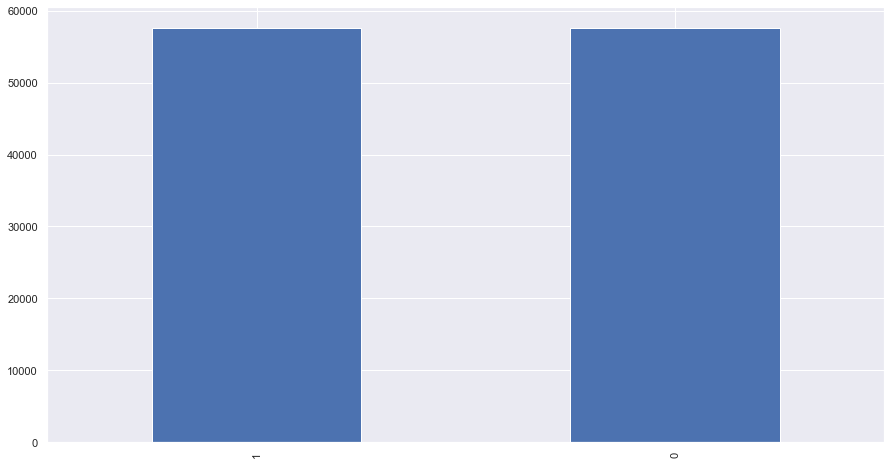

In [466]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy='minority',random_state=0)
X,y=over.fit_resample(data1.drop(columns='C_SEV'),data1['C_SEV'].values)
print('Filas que nos quedamos:', len(over.sample_indices_))
indicadores_undersampled = data1.iloc[over.sample_indices_]
indicadores_undersampled['C_SEV'].value_counts().plot.bar()

Separamos en train y test, tomando el 30% de los datos como test:

In [467]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y.astype(int), test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(80624, 20) (34554, 20) (80624,) (34554,)


Utilizaremos diferentes modelos para realizar el ajuste, viendo cual sería el más acertado.

### Predicción de fallecidos con Regresión Logística:



In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.616634
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                80624
Model:                          Logit   Df Residuals:                    80603
Method:                           MLE   Df Model:                           20
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.1104
Time:                        16:23:45   Log-Likelihood:                -49715.
converged:                       True   LL-Null:                       -55884.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9987      0.069     14.468      0.000       0.863       1.134
C_YEAR         0.0223      0.

Observamos que en el resumen de los coeficientes de las variables, la variable que cobra más importancia para predecir si es una colisión que puede ocasionar fallecidos es `P_SEX`. Es decir, dependiendo del sexo habrá mas o menos colisiones mortales, sin ser esta una variable determinante.


In [469]:
pred = modelo.predict(exog = X_train)
clasificacion = np.where(pred<0.5, 0, 1)

In [470]:
accuracy = accuracy_score(
            y_true    = y_train,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de train es: {100*accuracy}%")


El accuracy de train es: 65.41104385790831%


Ahora bien, hemos definido un umbral de 0.5 a partir del cual consideraremos que si el valor que toma Y es mayor se clasifica como una colisión donde no hay fallecidos:

In [471]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)

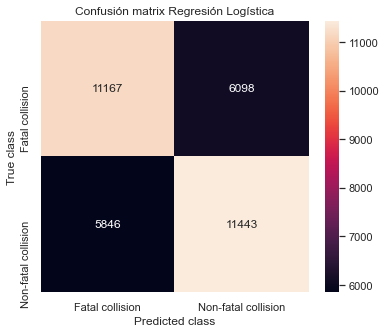

In [472]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, clasificacion)
plt.figure(figsize=(6,5))
labels= ['Fatal collision', 'Non-fatal collision']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Regresión Logística')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [473]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 65.43381374081149%


Observamos que la precisión de test es de 65% aproximadamente, una precisión aceptable. 

En la matriz de confusión vemos que a la hora de predecir se equivoca de igual manera, tanto para una clasificación como para la otra.  

### Predicción de fallecimientos con Árboles de Decisión:

Realizamos una búsqueda de hiperparámetros antes de ajustar los datos:

In [474]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(random_state=0)

# Definimos la rejilla
ps = np.linspace(1, 2, 10)
md = list(range(1, 12))
mf = list(range(1, 12))
h_parameters = {'max_depth':md,
               "max_features":mf}

cv = GridSearchCV(arbol, h_parameters, cv=10, n_jobs=-1, scoring='accuracy')


cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')

In [475]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features=11, random_state=0)

In [476]:
treeModel = cv.best_estimator_
treeModel.fit(X_train, y_train)

y_test_pred = treeModel.predict(X_test)
print(treeModel.score(X_test,y_test))

0.8597846848411183


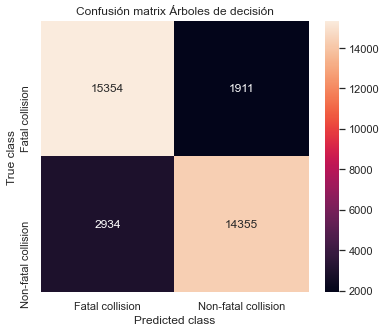

In [477]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
labels= ['Fatal collision', 'Non-fatal collision']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Árboles de decisión')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

A partir de la métrica vemos que este modelo es más preciso pero analizando la matriz de confusión vemos que predice peor los accidentes que no son mortales.

### Predicción de fallecimientos con Random Forest:

Antes de realizar el ajuste, hacemos una búsqueda de hiperparámetros.

best mean cross-validation score: 0.915
best parameters: {'max_depth': 11}


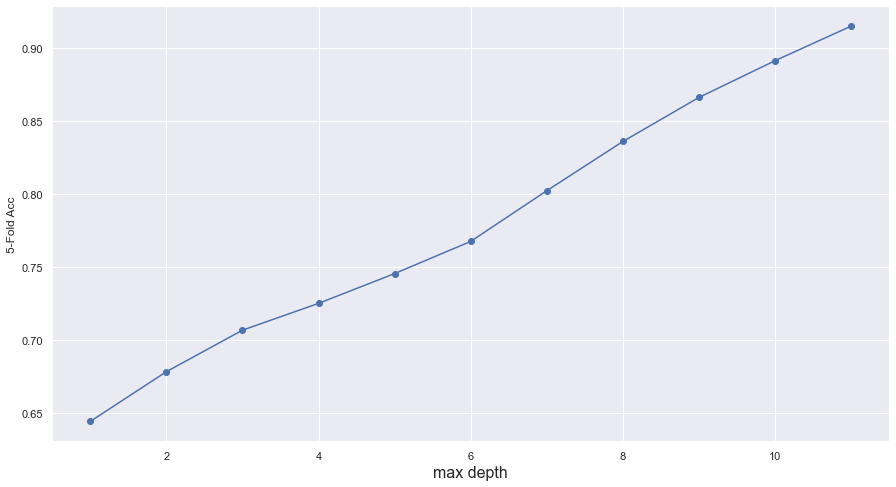

In [478]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
maxDepth   = range(1,12)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 200), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [479]:
y_pred = grid.best_estimator_.predict(X_test)

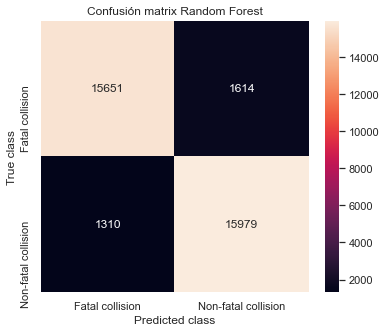

In [480]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
labels= ['Fatal collision', 'Non-fatal collision']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Random Forest')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Este ajuste mejora la precisión a la hora de predecir, pero por otro lado en la matriz de confusión vemos que hay mas error cuando se predice los accidentes que no son mortales. 

### Estudio previo de heridos:
Para predecir si hay heridos o no vamos a seleccionar las observaciones en las cuales las colisiones no son mortales:

In [481]:
data_heridos= data[data['C_SEV']==1]
data_heridos=data_heridos.drop(columns='C_SEV')

In [482]:
data_heridos.shape

(57589, 21)

Tomaremos la variable `P_ISEV` como la variable objetivo, ya que refleja los accidentes con heridos, es decir, los que necesitarían tratamiento médico.

In [483]:
data_heridos['P_ISEV'].value_counts()

2    31310
1    23484
0     2795
Name: P_ISEV, dtype: int64

Observamos que el Label Encoder no ha cambiado la codificación.

La variable que toma el valor 0 nos indica que hace referencia a objetos que no son personas, por ejemplo un coche aparcado. Eliminamos las observaciones con dicho valor:

In [484]:
data_heridos= data_heridos[data_heridos['P_ISEV']!=0]

In [485]:
data_heridos.shape

(54794, 21)

Ahora bien, definiremos los valores 2 y 3 como el valor 1, dado que son las observaciones que han resultado heridos tras la colisión, en concreto el valor 3 refleja los muertos en el acto o los que han fallecido tiempo después. En este caso le damos más peso al segundo escenario ya que existe la esperanza de que se salven con asistencia médica.

El valor 1 tomará el valor 0 ya que nos proporciona las personas que no han sufrido heridas tras el accidente:

In [486]:
def heridos(x):
    if x != 1:
        return 1
    else:
        return 0

In [487]:
data_new = data_heridos.assign(hurt = lambda x: x['P_ISEV'].aggregate(heridos))
data_new.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,hurt
0,9,10,0,13,1,6,1,1,2,0,...,1,51,1,1,73,1,1,2,1,0
1,13,9,5,12,0,5,1,2,1,0,...,1,53,1,1,17,1,2,2,1,1
2,13,7,1,0,0,3,0,0,0,0,...,1,53,1,1,33,1,2,2,1,1
3,11,0,1,10,1,6,1,0,1,0,...,1,59,1,1,50,1,1,2,1,0
4,12,2,1,2,1,5,0,0,0,1,...,1,63,2,1,36,3,1,2,2,0


In [488]:
data_new= data_new.drop(columns='P_ISEV')

In [489]:
X= data_new.drop(columns= 'hurt')
y= data_new['hurt']

In [490]:
print("Número de observaciones por clase")
print(data_new['hurt'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * data_new['hurt'].value_counts(normalize=True))

Número de observaciones por clase
1    31310
0    23484
Name: hurt, dtype: int64

Porcentaje de observaciones por clase
1    57.141293
0    42.858707
Name: hurt, dtype: float64


Observamos que están balanceados, por tanto no hace falta balancear los datos.


In [491]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y.astype(int), test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(38355, 20) (16439, 20) (38355,) (16439,)


### Predicción de heridos con Regresión Logística:



In [492]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.616704
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   hurt   No. Observations:                38355
Model:                          Logit   Df Residuals:                    38334
Method:                           MLE   Df Model:                           20
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                 0.09694
Time:                        16:32:48   Log-Likelihood:                -23654.
converged:                       True   LL-Null:                       -26193.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6175      0.109     -5.670      0.000      -0.831      -0.404
C_YEAR         0.0121      0.

La variable que más influye en este caso también es `P_SEX`, no obstante no es determinante ya que muchas otras toman valores influyentes.

In [493]:
pred = modelo.predict(exog = X_train)
clasificacion = np.where(pred<0.5, 0, 1)

In [494]:
accuracy = accuracy_score(
            y_true    = y_train,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 64.35145352626776%


Tomamos un umbral de 0.5.

Ahora bien, vamos a realizarlo con los datos de test:

In [495]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)

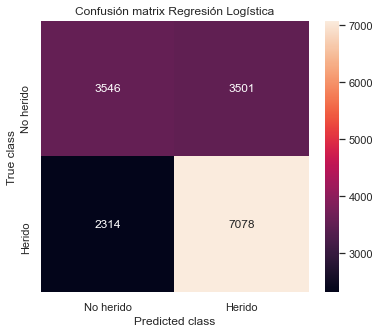

In [496]:
conf_matrix= confusion_matrix(y_test, clasificacion)
plt.figure(figsize=(6,5))
labels= ['No herido', 'Herido']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Regresión Logística')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [497]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 64.62680211691709%


Observamos que la precisión es aceptable. En la matriz confusión vemos que predice más Heridos que No heridos, por tanto es un buen modelo a la hora de predecir ya que para la aseguradora es preferible ser precavidos. 

In [498]:
data_new[['P_USER','hurt']].groupby('P_USER').mean()

,hurt
P_USER,
0,0.686662
1,0.528218
2,0.542023
3,0.978744
4,0.936740
5,0.911003


El `P_USER` de tipo 3 es el que mas media tiene de personas heridas en los accidentes, que corresponden a los peatones. Por tanto, si en un accidente está implicado un peatón lo más seguro es que se necesite un tratamiento médico. De manera similar ocurre con los tipos 4 y 5 que corresponden con un ciclista y motorista respectivamente.

### Predicción de heridos con Árboles de Decisión:

In [499]:
X= data_new.drop(columns= 'hurt')
y= data_new['hurt']

In [500]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X.astype(float), y.astype(int), test_size=0.30, random_state=0)
print(X_train2.shape, X_test2.shape,y_train2.shape, y_test2.shape)

(38355, 20) (16439, 20) (38355,) (16439,)


Realizamos una búsqueda de hiperparámetros:

In [501]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [502]:
arbol = DecisionTreeClassifier(random_state=0)

# Definimos la rejilla
ps = np.linspace(1, 2, 10)
md = list(range(1, 12))
mf = list(range(1, 12))
h_parameters = {'max_depth':md,
               "max_features":mf}

cv = GridSearchCV(arbol, h_parameters, cv=10, n_jobs=-1, scoring='accuracy')


cv.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')

In [503]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features=9, random_state=0)

In [504]:
treeModel = cv.best_estimator_
treeModel.fit(X_train2, y_train2)

y_test_pred2 = treeModel.predict(X_test2)
print(treeModel.score(X_test2,y_test2))

0.6860514629843665


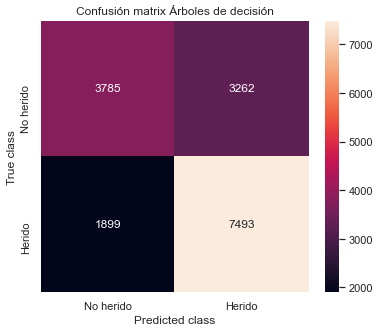

In [505]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test2, y_test_pred2)
plt.figure(figsize=(6,5))
labels= ['No herido', 'Herido']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Árboles de decisión')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

En este caso, la precisión es ligeramente mejor. Observamos que la matriz de confusión es también similar ya que predice mas Heridos que No heridos, siendo este el objetivo: _'Más vale prevenir que curar'_ 

### Predicción de heridos con Random Forest:

best mean cross-validation score: 0.692
best parameters: {'max_depth': 11}


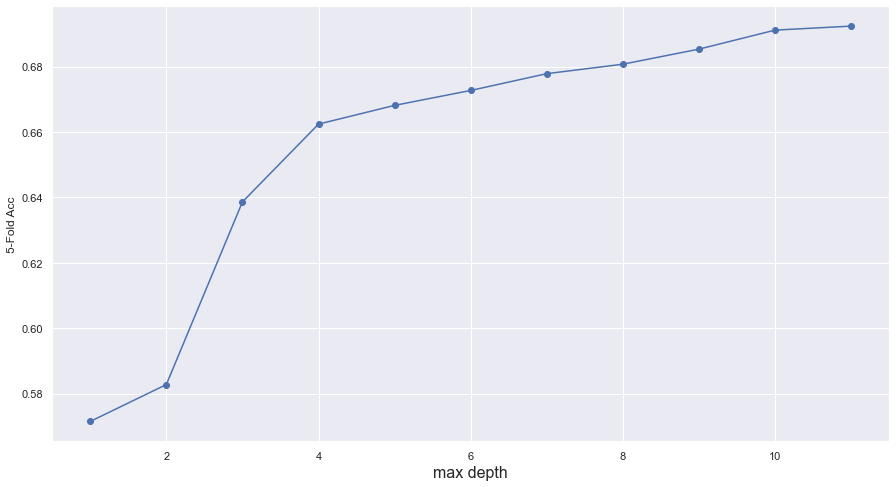

In [506]:
maxDepth   = range(1,12)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 200), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train2, y_train2)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [507]:
y_pred = grid.best_estimator_.predict(X_test2)

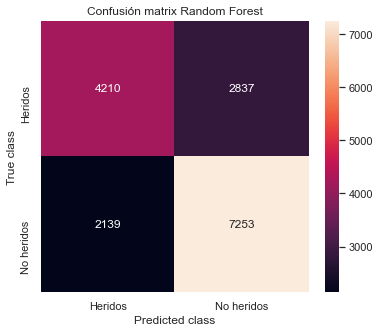

In [508]:
conf_matrix= confusion_matrix(y_test2, y_pred)
plt.figure(figsize=(6,5))
labels= ['Heridos', 'No heridos']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Random Forest')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

En el ajuste con Random Forest la precisión mejora ligeramente, llegando hasta 69%. 

La matriz de confusión es igual que en los modelos anteriores, seguimos en la línea de ser prudentes:  _'Aseguradora precavida vale por 2'_ 

En conclusión, este algoritmo es el más adecuado para predecir tanto los fallecidos en un accidente como los heridos.

## CLUSTERING:

Ahora bien, utilizaremos algoritmos no supervisados, en concreto algoritmos de clustering, así veremos cómo serán las características de los distintos grupos:

### Clustering Jerárquico: LINKAGE

Para ajustar los datos a este modelo utilizaremos una muestra menor, con 200 observaciones, ya que con una muestra mayor el algoritmo es incapaz de ajustar los datos.

In [509]:
data2 = data.sample(n=200,random_state=0)

In [510]:
from scipy.cluster.hierarchy import linkage
linkage_type="ward"
linkage_matrix=linkage(data2,linkage_type)

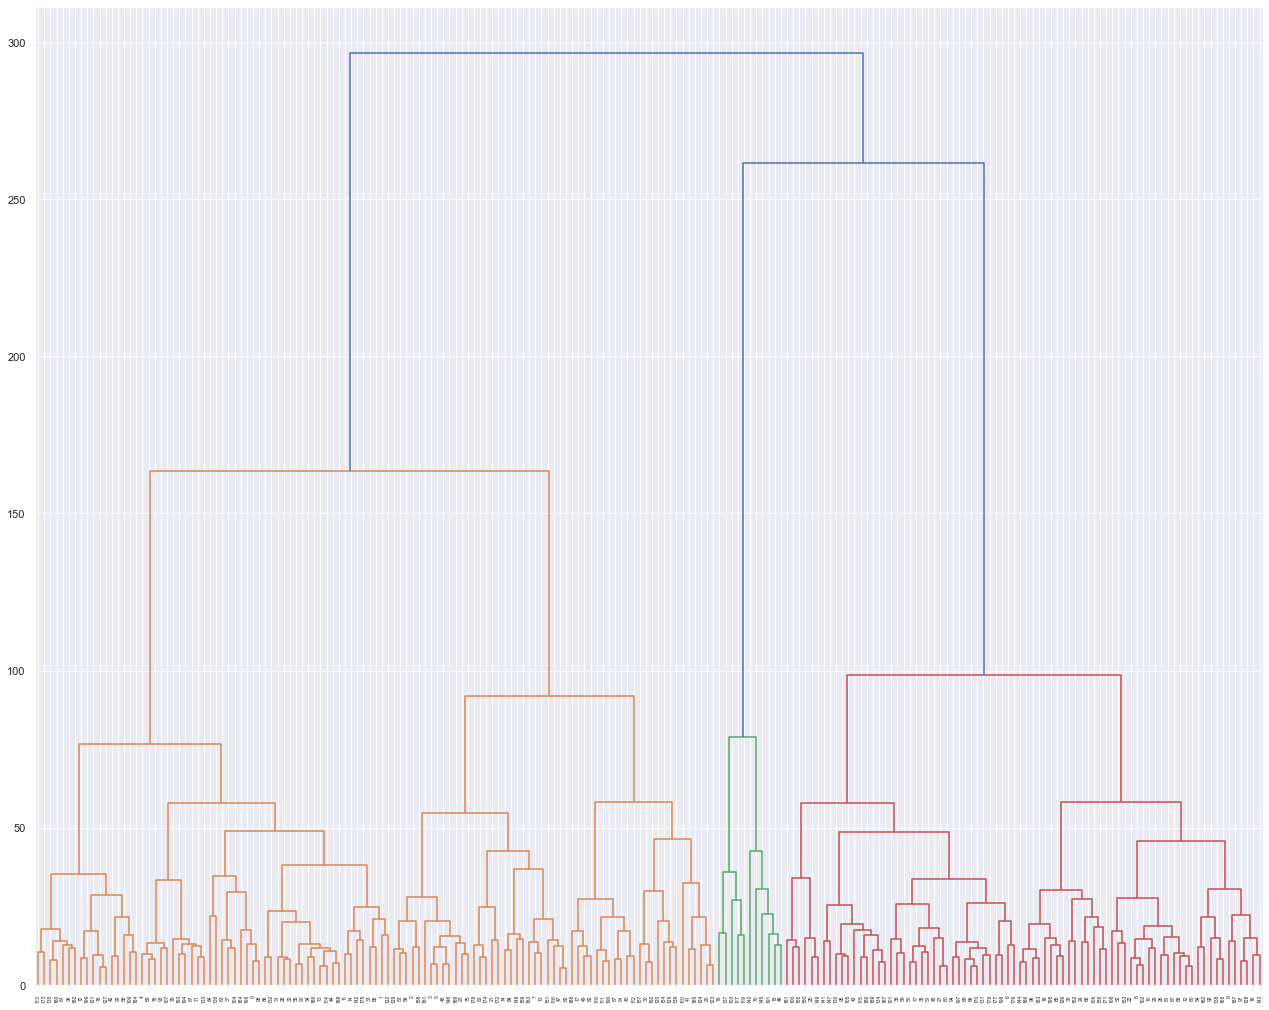

In [511]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

dendrogram(linkage_matrix)

plt.show()

In [512]:
ward = AgglomerativeClustering(n_clusters=4)
wardclusters = ward.fit_predict(data2)
wardclusters

array([3, 3, 1, 1, 3, 1, 0, 1, 0, 0, 0, 3, 0, 1, 3, 2, 0, 1, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 0, 3, 0, 1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 1, 1, 3, 0,
       3, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 3, 1, 1, 3, 0, 0, 3, 1, 3, 3, 3,
       0, 3, 0, 3, 2, 3, 3, 3, 1, 1, 3, 0, 3, 3, 0, 0, 1, 1, 1, 0, 3, 0,
       0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 3, 0, 0, 3, 0, 3,
       1, 1, 1, 3, 3, 0, 1, 2, 1, 2, 1, 3, 3, 1, 1, 1, 0, 3, 0, 1, 0, 0,
       3, 3, 0, 3, 3, 2, 0, 1, 2, 0, 3, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 3, 0, 0, 0, 3, 1, 0, 0, 1, 3, 1, 3,
       0, 0, 1, 0, 0, 0, 3, 0, 3, 1, 3, 0, 1, 0, 1, 2, 1, 3, 3, 0, 3, 0,
       0, 3], dtype=int64)

En este caso considera cuatro grupos, haciendo uso de la función _groupBy_ vamos a reflejar la media, la mediana y la moda de cada uno de los clusters:

In [513]:
data2.groupby(by = wardclusters).mean()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,7.230769,6.192308,3.051282,12.769231,0.987179,0.961538,8.948718,0.820513,0.500000,0.923077,...,0.397436,1.474359,52.115385,1.641026,1.307692,18.153846,2.333333,1.397436,1.833333,1.384615
1,7.773585,5.132075,3.339623,14.075472,0.981132,0.830189,8.320755,0.735849,0.622642,0.698113,...,0.452830,2.056604,53.245283,1.245283,1.396226,59.509434,1.396226,1.641509,1.924528,1.339623
2,9.363636,5.636364,2.636364,13.636364,1.000000,0.181818,8.909091,0.636364,0.363636,1.181818,...,22.818182,1.000000,0.000000,1.272727,1.636364,33.090909,11.909091,2.000000,1.636364,3.090909
3,8.431034,5.413793,2.913793,14.310345,0.982759,1.086207,9.327586,0.879310,0.793103,1.000000,...,0.482759,2.706897,55.586207,1.172414,1.431034,37.793103,1.327586,1.482759,1.879310,1.224138


In [514]:
data2.groupby(by = wardclusters).median()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,7.0,7.0,3.0,14.0,1.0,1.0,6.0,1.0,0.0,0.0,...,0.0,1.0,53.0,1.0,1.0,18.5,1.0,1.0,2.0,1.0
1,7.0,5.0,3.0,14.0,1.0,1.0,6.0,1.0,0.0,0.0,...,0.0,1.0,54.0,1.0,1.0,58.0,1.0,2.0,2.0,1.0
2,12.0,6.0,3.0,16.0,1.0,0.0,5.0,1.0,0.0,0.0,...,25.0,0.0,0.0,1.0,2.0,23.0,13.0,2.0,1.0,3.0
3,8.5,5.5,3.0,16.0,1.0,1.0,6.0,1.0,0.0,0.0,...,0.0,1.0,56.0,1.0,1.0,37.0,1.0,2.0,2.0,1.0


In [515]:
data2.groupby(by = wardclusters).agg(pd.Series.mode)

,C_WDAY,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,P_ID,P_SEX,P_PSN,P_ISEV,P_SAFE,P_USER
0,2,1,1,6,1,0,0,0,16,0,1,1,1,1,1,2,1
1,3,1,1,6,1,0,0,0,16,0,1,1,1,1,2,2,1
2,3,1,0,5,1,0,0,0,16,25,0,1,2,13,2,0,3
3,5,1,1,6,0,0,0,0,16,0,1,1,1,1,2,2,1


In [516]:
data2[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR']].groupby(by=wardclusters).agg(pd.Series.mode)

,C_WDAY,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE
0,2,1,1,6,1,0,0,0,16,0,1
1,3,1,1,6,1,0,0,0,16,0,1
2,3,1,0,5,1,0,0,0,16,25,0
3,5,1,1,6,0,0,0,0,16,0,1


In [517]:
data2[['P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']].groupby(by=wardclusters).agg(pd.Series.mode)

,P_ID,P_SEX,P_PSN,P_ISEV,P_SAFE,P_USER
0,1,1,1,1,2,1
1,1,1,1,2,2,1
2,1,2,13,2,0,3
3,1,1,1,2,2,1


In [518]:
data2[['C_VEHS', 'C_CONF','V_TYPE','P_ISEV',
       'P_USER']].groupby(by=wardclusters).agg(pd.Series.mode)

,C_VEHS,C_CONF,V_TYPE,P_ISEV,P_USER
0,1,6,1,1,1
1,1,6,1,2,1
2,0,5,0,2,3
3,1,6,1,2,1


In [519]:
data2[['C_VEHS', 'C_CONF','V_TYPE','P_ISEV',
       'P_USER']].groupby(by=wardclusters).mean()

,C_VEHS,C_CONF,V_TYPE,P_ISEV,P_USER
0,0.961538,8.948718,1.474359,1.397436,1.384615
1,0.830189,8.320755,2.056604,1.641509,1.339623
2,0.181818,8.909091,1.000000,2.000000,3.090909
3,1.086207,9.327586,2.706897,1.482759,1.224138


Los resultados que obtenemos son muy homogéneos, posiblemente por el tamaño de la muestra que debemos tomar para que el algoritmo converja. Por tanto, un estudio de las características no se puede realizar ya que son valores muy similares.

### Clustering Particional: KMEANS & KMODES


#### KMEANS:

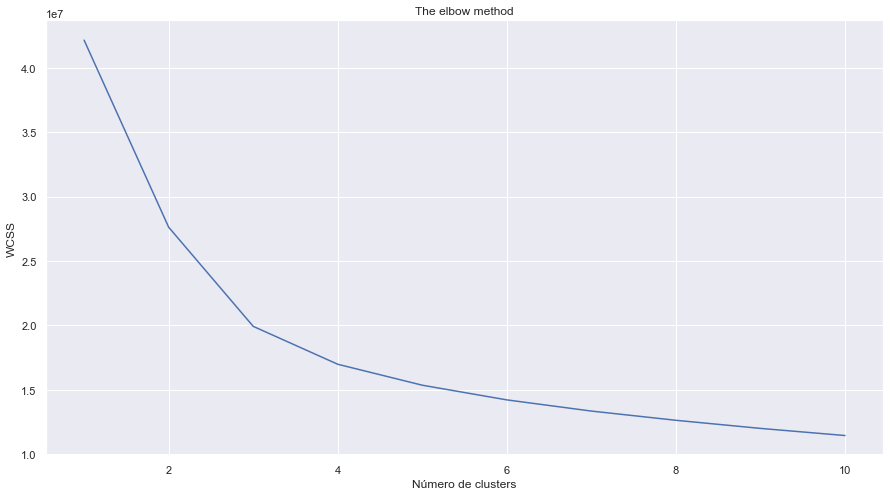

In [520]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# Mostrando los resultados en un gráfico para determinar un codo 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # Suma de cuadrados dentro del cluster
plt.show()

Observamos que el gráfico no es el ideal, pero podemos estimar que los datos al ajustarse a este algoritmo funciona mejor con 3 clusters.

In [521]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([1, 0, 0, ..., 0, 0, 0])

In [522]:
kmeans_clusters=pd.DataFrame(y_kmeans)
print(kmeans_clusters.value_counts(ascending=True))

2     2753
1    22080
0    33771
dtype: int64


In [523]:
data.groupby(by=y_kmeans).mean()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,6.774866,5.692547,3.081016,13.802138,0.984040,1.045897,9.103995,0.936040,0.631281,0.862782,...,0.509698,1.758550,52.235350,1.619081,1.410086,22.841639,2.167392,1.491043,1.948477,1.457404
1,7.347600,5.710598,2.918614,13.674819,0.982382,1.108605,9.474275,0.970924,0.598324,0.787002,...,0.573460,1.714447,53.178895,1.244928,1.417935,54.791803,1.529212,1.478351,1.922373,1.275634
2,7.278968,5.950236,2.772612,13.876135,0.968398,0.264439,6.737741,1.418816,0.516164,0.539775,...,20.926989,1.673447,0.194333,1.115874,1.457319,34.810025,10.988376,1.934617,1.905558,3.112241


In [524]:
data.groupby(by=y_kmeans).median()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,6,6,3,15,1,1,6,1,0,0,...,0,1,53,1,1,22,1,2,2,1
1,7,6,3,14,1,1,6,1,0,0,...,0,1,54,1,1,52,1,2,2,1
2,7,6,3,15,1,0,5,1,0,0,...,25,0,0,1,1,31,13,2,1,3


In [525]:
data.groupby(by = y_kmeans).agg(pd.Series.mode)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,0,7,4,16,1,1,6,1,0,0,...,0,1,54,1,1,18,1,2,2,1
1,7,7,4,16,1,1,6,1,0,0,...,0,1,54,1,1,40,1,2,2,1
2,5,9,1,16,1,0,5,1,0,0,...,25,0,0,1,1,18,13,2,0,3


In [526]:
data[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR']].groupby(by=y_kmeans).agg(pd.Series.mode)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR
0,0,7,4,16,1,1,6,1,0,0,0,16,0,1,54
1,7,7,4,16,1,1,6,1,0,0,0,16,0,1,54
2,5,9,1,16,1,0,5,1,0,0,0,16,25,0,0


In [527]:
data[['P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']].groupby(by=y_kmeans).agg(pd.Series.mode)

,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1,1,18,1,2,2,1
1,1,1,40,1,2,2,1
2,1,1,18,13,2,0,3


In [528]:
data[['C_CONF',
        'V_TYPE','P_AGE', 'P_PSN', 'P_SAFE',
       'P_USER']].groupby(by=y_kmeans).agg(pd.Series.mode)

,C_CONF,V_TYPE,P_AGE,P_PSN,P_SAFE,P_USER
0,6,1,18,1,2,1
1,6,1,40,1,2,1
2,5,0,18,13,0,3


In [529]:
data[['C_CONF',
        'V_TYPE','P_AGE', 'P_PSN', 'P_SAFE',
       'P_USER']].groupby(by=y_kmeans).mean()

,C_CONF,V_TYPE,P_AGE,P_PSN,P_SAFE,P_USER
0,9.103995,1.758550,22.841639,2.167392,1.948477,1.457404
1,9.474275,1.714447,54.791803,1.529212,1.922373,1.275634
2,6.737741,1.673447,34.810025,10.988376,1.905558,3.112241


In [530]:
data[['C_CONF',
        'V_TYPE','P_AGE', 'P_PSN', 'P_SAFE',
       'P_USER']].groupby(by=y_kmeans).median()

,C_CONF,V_TYPE,P_AGE,P_PSN,P_SAFE,P_USER
0,6,1,22,1,2,1
1,6,1,52,1,2,1
2,5,0,31,13,1,3


Estudiando las características de los diferentes clusters:
- Grupo 0: conductores de coche jóvenes que llevaban todos las medidas de seguridad
- Grupo 1: conductores de mediana edad de coches que llevaban todos las medidas de seguridad
- Grupo 2: peatones jóvenes que tienen accidenetes de coches que se dan a la fuga

Debido a que los variables son categóricas vamos a probar a usar el método de KModes para ver si el modelo mejora

#### KMODES:

In [531]:
!pip install KModes

In [532]:
from kmodes.kmodes import KModes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 636212.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3726, cost: 599629.0
Run 1, iteration: 2/100, moves: 1036, cost: 599629.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6729, cost: 586526.0
Run 1, iteration: 2/100, moves: 1031, cost: 586526.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13266, cost: 569311.0
Run 1, iteration: 2/100, moves: 70, cost: 569311.0
Initializ

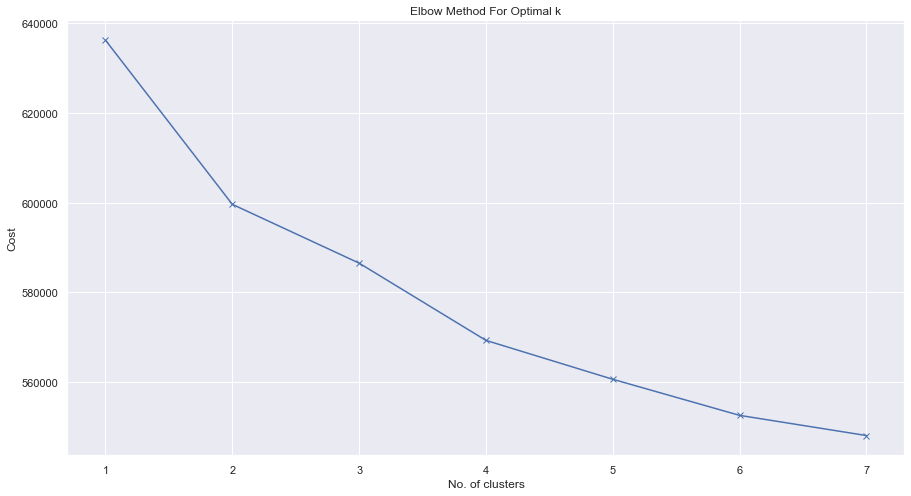

In [533]:
cost = []
K = range(1,8)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, verbose=1, random_state=23)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


A partir de la gráfica vemos que el codo se forma en el número de clusters igual a cuatro:

In [534]:
kmodes = KModes(n_jobs = -1, n_clusters = 4, random_state = 0,verbose=1)
a = kmodes.fit_predict(data)

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [535]:
data.groupby(by=a).mean()


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,6.831416,5.806522,3.012058,13.653625,0.983015,1.130077,9.707951,1.055168,0.437036,0.654760,...,0.854397,1.999676,51.077469,1.207708,1.230041,36.907815,1.573174,1.491913,1.865580,1.286214
1,6.715650,5.725544,3.225243,14.300009,0.984083,1.185666,9.759098,0.946657,0.551665,0.751527,...,0.785081,1.406263,52.162609,2.363589,1.657059,29.842037,3.682096,1.452465,2.082595,1.972038
2,7.513993,5.267931,2.772748,14.006117,0.992201,1.237039,10.203701,0.993577,1.432023,1.289800,...,1.461691,1.440893,51.657134,1.183667,1.579446,38.381251,1.617831,1.289800,1.873987,1.140694
3,7.624023,5.690960,2.875821,13.265561,0.973413,0.395475,5.790846,0.719633,0.697737,1.108435,...,4.425503,1.500469,43.676572,1.331144,1.606089,35.507038,3.680638,1.770305,2.030967,1.656866


In [536]:
data.groupby(by=a).median()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,7,6,3,14,1,1,7,1,0,0,...,0,1,54,1,1,34,1,2,2,1
1,6,6,4,15,1,1,7,1,0,0,...,1,1,53,2,2,23,3,1,2,2
2,7,5,3,15,1,1,9,1,2,1,...,1,1,54,1,2,37,1,1,2,1
3,8,6,3,14,1,0,5,0,0,0,...,0,1,52,1,2,32,1,2,2,1


In [537]:
data.groupby(by = a).agg(pd.Series.mode)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,3,8,5,16,1,1,6,1,0,0,...,0,1,54,1,1,18,1,2,2,1
1,4,9,4,16,1,1,6,1,0,0,...,1,1,54,2,2,18,3,1,2,2
2,12,0,3,17,1,1,6,1,2,1,...,1,1,57,1,2,18,1,1,2,1
3,15,6,2,19,1,0,5,0,0,0,...,0,1,0,1,2,24,1,2,2,1


In [538]:
data[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR']].groupby(by=a).agg(pd.Series.mode)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR
0,3,8,5,16,1,1,6,1,0,0,0,16,0,1,54
1,4,9,4,16,1,1,6,1,0,0,0,16,1,1,54
2,12,0,3,17,1,1,6,1,2,1,0,0,1,1,57
3,15,6,2,19,1,0,5,0,0,0,0,16,0,1,0


In [539]:
data[['P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']].groupby(by=a).agg(pd.Series.mode)

,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1,1,18,1,2,2,1
1,2,2,18,3,1,2,2
2,1,2,18,1,1,2,1
3,1,2,24,1,2,2,1


In [540]:
data[['C_CONF','C_WTHR','P_ISEV','C_RSUR',
       'P_USER']].groupby(by=a).agg(pd.Series.mode)

,C_CONF,C_WTHR,P_ISEV,C_RSUR,P_USER
0,6,0,2,0,1
1,6,0,1,0,2
2,6,2,1,1,1
3,5,0,2,0,1


In [541]:
data[['C_CONF','C_WTHR','P_ISEV','C_RSUR',
       'P_USER']].groupby(by=a).mean()

,C_CONF,C_WTHR,P_ISEV,C_RSUR,P_USER
0,9.707951,0.437036,1.491913,0.654760,1.286214
1,9.759098,0.551665,1.452465,0.751527,1.972038
2,10.203701,1.432023,1.289800,1.289800,1.140694
3,5.790846,0.697737,1.770305,1.108435,1.656866


Estudiando los clusters:
- Grupo 0: representado por conductores que han resultado heridos 
- Grupo 1: representado por pasajeros que no han resultado heridos 
- Grupo 2: representado por conductores que no han resultado heridos en un día lluvioso con la carretera mojada
- Grupo 3: representado por accidentes donde solo había un coche implicado y el conductor ha resultado herido

### Clustering de Probabilidad: GAUSSIAN MIXTURE

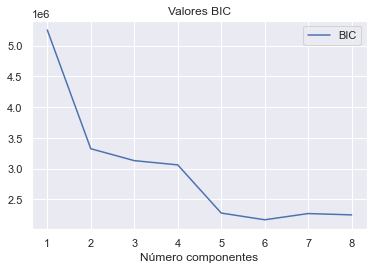

In [542]:
from sklearn.mixture import GaussianMixture
n_components = range(1, 9)
valores_bic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full",random_state=123)
    modelo.fit(data)
    valores_bic.append(modelo.bic(data))


fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

A partir del gráfico observamos que el número de cluster más adecuado es igual a 6, ya que el valor de la medida BIC es el mas bajo.

In [543]:
modelo = GaussianMixture(n_components=6, covariance_type="full",random_state=123)
GM_clusters=modelo.fit_predict(data)

In [544]:
data.groupby(by=GM_clusters).mean()


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,7.171330,5.618597,3.063280,13.194146,0.597934,1.642273,9.212656,1.374085,0.823504,1.491606,...,0.891089,3.010762,52.635816,2.558330,1.337495,33.271201,2.814895,1.703831,2.127852,1.569092
1,6.996358,5.767694,3.134068,13.616006,1.000000,0.897529,8.086524,1.751353,0.674870,0.936509,...,0.463431,3.373068,52.590609,1.943794,1.331233,30.500049,3.021164,1.498376,2.069987,1.800669
2,7.008572,5.844535,3.060004,14.175336,1.000000,1.103253,11.358270,1.000000,0.494253,0.326904,...,0.593805,3.482369,52.692383,2.113189,1.373076,27.791350,3.255601,1.450419,2.342685,1.913891
3,6.989766,5.668668,2.977391,13.765919,1.000000,1.077540,9.279221,0.705271,0.607315,0.832154,...,0.527191,1.000000,52.522100,1.193927,1.444848,37.953711,1.387855,1.474871,1.838316,1.193927
4,7.871495,5.813084,3.079439,13.490654,0.810748,0.628505,8.079439,1.292056,0.656542,0.693925,...,24.327103,0.308411,0.000000,1.647196,1.467290,33.838785,12.869159,1.642523,1.623832,3.028037
5,7.201063,5.957927,2.702391,13.935341,1.000000,0.172276,6.403012,1.448627,0.488043,0.519043,...,20.839681,1.895040,0.000000,1.003100,1.457484,34.988485,10.895483,1.993800,1.943756,3.172276


In [545]:
data.groupby(by=GM_clusters).median()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,7.0,6.0,3.0,14.0,1.0,1.0,6.0,1.0,0.0,0.0,...,0.0,1.0,54.0,1.0,1.0,28.0,1.0,2.0,2.0,1.0
1,7.0,6.0,3.0,14.0,1.0,1.0,6.0,0.0,0.0,0.0,...,0.0,1.0,54.0,2.0,1.0,24.0,1.0,2.0,2.0,2.0
2,7.0,6.0,3.0,15.0,1.0,1.0,13.0,1.0,0.0,0.0,...,1.0,1.0,54.0,2.0,1.0,21.0,3.0,1.0,2.0,2.0
3,7.0,6.0,3.0,15.0,1.0,1.0,6.0,1.0,0.0,0.0,...,0.0,1.0,53.0,1.0,1.0,35.0,1.0,2.0,2.0,1.0
4,8.5,6.0,3.0,14.0,1.0,0.0,6.0,1.0,0.0,0.0,...,25.0,0.0,0.0,1.0,1.0,29.5,13.0,2.0,0.0,3.0
5,7.0,6.0,3.0,15.0,1.0,0.0,5.0,1.0,0.0,0.0,...,25.0,0.0,0.0,1.0,1.0,31.0,13.0,2.0,1.0,3.0


In [546]:
data.groupby(by = GM_clusters).agg(pd.Series.mode)

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,0,4,16,1,1,6,0,0,0,0,...,0,1,54,1,1,18,1,2,2,1
1,7,5,16,1,1,6,0,0,0,0,...,0,1,54,1,1,18,1,2,2,2
2,7,4,16,1,1,6,1,0,0,0,...,1,1,54,1,1,18,1,1,2,2
3,11,4,16,1,1,6,1,0,0,0,...,0,1,54,1,1,18,1,2,2,1
4,9,4,16,1,0,5,1,0,0,0,...,25,0,0,1,1,18,13,2,0,3
5,9,1,16,1,0,5,1,0,0,0,...,25,0,0,1,1,18,13,2,0,3


In [547]:
from sklearn.metrics import silhouette_score
silhouette_score(data,labels=GM_clusters)

0.009785899848541658

In [548]:
data[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR']].groupby(by=GM_clusters).agg(pd.Series.mode)

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR
0,0,4,16,1,1,6,0,0,0,0,16,0,1,54
1,7,5,16,1,1,6,0,0,0,0,16,0,1,54
2,7,4,16,1,1,6,1,0,0,0,0,1,1,54
3,11,4,16,1,1,6,1,0,0,0,16,0,1,54
4,9,4,16,1,0,5,1,0,0,0,16,25,0,0
5,9,1,16,1,0,5,1,0,0,0,16,25,0,0


In [549]:
data[['P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']].groupby(by=GM_clusters).agg(pd.Series.mode)

,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1,1,18,1,2,2,1
1,1,1,18,1,2,2,2
2,1,1,18,1,1,2,2
3,1,1,18,1,2,2,1
4,1,1,18,13,2,0,3
5,1,1,18,13,2,0,3


Observamos que mediante este modelo los datos estan igualemente repartidos por todos los clusters, no hay ninguna variable que los discrimine claramente cada grupo.

### CLustering de densidad: DBSCAN

In [550]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [551]:
dbscan=DBSCAN(eps=13,min_samples=30)
dbclusters=dbscan.fit_predict(data)

In [552]:
data.groupby(by=dbclusters).mean()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
-1,7.918182,5.636364,2.969697,12.684848,0.918182,3.148485,10.581818,2.221212,1.066667,1.433333,...,4.772727,5.942424,35.442424,4.830303,1.163636,56.257576,4.387879,1.436364,2.206061,1.451515
0,6.994253,5.698861,3.016935,13.757215,0.983695,1.056480,9.247523,0.945934,0.615609,0.827820,...,0.525259,1.719562,52.609340,1.453519,1.417432,35.212301,1.910298,1.489749,1.939808,1.389688
1,7.417778,5.889778,2.785333,13.823556,0.965778,0.104889,5.357778,1.408000,0.548000,0.614667,...,25.000000,0.000000,0.000000,1.117778,1.491556,35.152444,13.016444,1.930667,2.119111,3.000000
2,6.583120,6.322251,2.603581,14.465473,0.989770,1.035806,13.306905,1.161125,0.317136,0.145780,...,0.869565,10.897698,0.010230,1.010230,1.281330,27.547315,1.017903,1.984655,0.762148,3.966752
3,7.622047,6.370079,3.165354,13.385827,0.984252,1.622047,9.047244,0.748031,0.566929,1.086614,...,1.314961,1.433071,54.574803,0.433071,0.181102,111.000000,0.354331,0.299213,0.228346,0.283465


In [553]:
data.groupby(by = dbclusters).agg(pd.Series.mode)

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
-1,11,5,16,1,1,6,1,0,0,0,...,0,1,0,1,1,111,1,2,0,0
0,7,4,16,1,1,6,1,0,0,0,...,0,1,54,1,1,18,1,2,2,1
1,9,3,16,1,0,5,1,0,0,0,...,25,0,0,1,1,18,13,2,0,3
2,5,1,16,1,1,15,1,0,0,0,...,1,11,0,1,1,16,1,2,0,4
3,9,5,17,1,1,6,1,0,0,0,...,1,1,54,0,0,111,0,0,0,0


In [554]:
data[['C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR']].groupby(by=dbclusters).agg(pd.Series.mode)

,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR
-1,5,16,1,1,6,1,0,0,0,16,0,1,0
0,4,16,1,1,6,1,0,0,0,16,0,1,54
1,3,16,1,0,5,1,0,0,0,16,25,0,0
2,1,16,1,1,15,1,0,0,0,16,1,11,0
3,5,17,1,1,6,1,0,0,0,16,1,1,54


In [555]:
data[['P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']].groupby(by=dbclusters).agg(pd.Series.mode)

,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
-1,1,1,111,1,2,0,0
0,1,1,18,1,2,2,1
1,1,1,18,13,2,0,3
2,1,1,16,1,2,0,4
3,0,0,111,0,0,0,0


In [556]:
data[['C_CONF','V_TYPE','P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']].groupby(by=dbclusters).agg(pd.Series.mode)

,C_CONF,V_TYPE,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
-1,6,1,111,1,2,0,0
0,6,1,18,1,2,2,1
1,5,0,18,13,2,0,3
2,15,11,16,1,2,0,4
3,6,1,111,0,0,0,0


In [557]:
data[['C_CONF','V_TYPE','P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']].groupby(by=dbclusters).mean()

,C_CONF,V_TYPE,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
-1,10.581818,5.942424,56.257576,4.387879,1.436364,2.206061,1.451515
0,9.247523,1.719562,35.212301,1.910298,1.489749,1.939808,1.389688
1,5.357778,0.000000,35.152444,13.016444,1.930667,2.119111,3.000000
2,13.306905,10.897698,27.547315,1.017903,1.984655,0.762148,3.966752
3,9.047244,1.433071,111.000000,0.354331,0.299213,0.228346,0.283465


Estudiando los clusters:
- Grupo 0: está representado por los accidentes donde están implicados dos vehículos y resulta herido el conductor
- Grupo 1: está representado por los peatones que resultan heridos en un accidente con un vehículo  
- Grupo 2: está representado por personas jóvenes en bicicleta que tienen un accidente contra un vehículo y resultan heridos
- Grupo 3: está representado por accidentes entre dos vehículos (tanto coches aparcados como coches en movimiento) 

El grupo 3 en DBSCAN no se distingue claramente, sin embargo, el resto de clusters están muy bien diferenciados.

## Distribución V_TYPE:
Estudiaremos como se distribuye el tipo de vehículo para ver cuales son más propensos a tener accidentes.

In [558]:
data['V_TYPE'].value_counts()

1     48332
0      2378
3      1798
9      1292
11     1251
4       900
5       712
2       634
8       477
18      284
6       234
10       98
14       81
16       39
12       37
17       26
13       13
7        11
15        7
Name: V_TYPE, dtype: int64

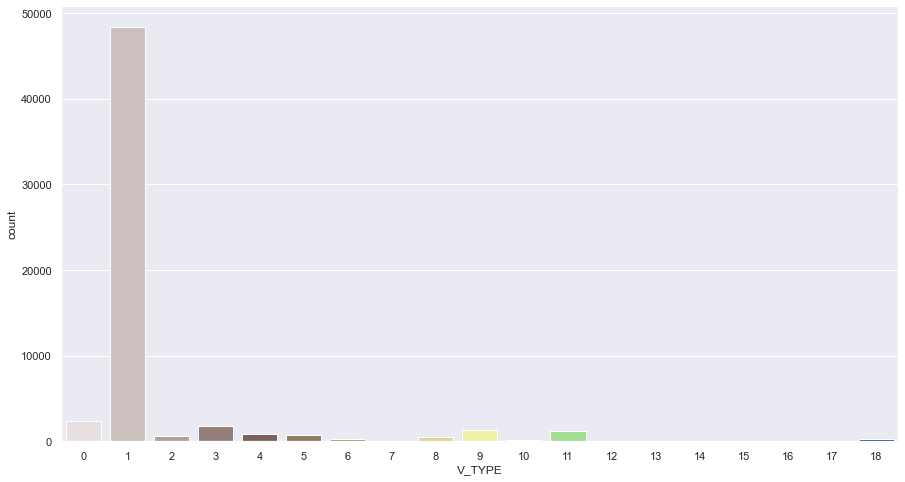

In [559]:
sns.set(rc = {'figure.figsize':(15,8)})
c=sns.diverging_palette(145, 20, s=60, as_cmap=False)
g=sns.countplot(x='V_TYPE',data=data,log=False,palette=(sns.color_palette("terrain_r", 19)))

Observamos que el tipo de vehículo que más accidentes tiene es el coche particular, lo cual es lo más lógico ya que hay más cantidad de coches en la carretera que máquinas de nieve, siendo este el número 16, por ejemplo.